# Lab02
## DNA Sequence Alignment Notebook
This notebook performs a global pairwise alignment between two DNA sequences, calculates the optimal score, and visualizes the match using a dot-plot.

For the Discusion/Activity 2:
1) Run all the code. Make sure it works and you get the outputs
2) Answer the question along the notebook
3) Save the notebook with your name (not initials). Save as HTML and export as PDF. Then, submit the assignment to MyCourses.

### 1. Install and Import Dependencies
We use `biopython` for the alignment algorithm and `matplotlib` for the dot-plot.

In [ ]:
# !pip install biopython matplotlib

import matplotlib.pyplot as plt
import numpy as np
from Bio import Align

print("Libraries imported successfully.")

In [ ]:
seq1 = "TTAAACCGGG"
seq2 = "TTAACCG"

print(f"Sequence 1: {seq1}")
print(f"Sequence 2: {seq2}")

### 3. Generate Alignment and Identify Best Score
We use the Needleman-Wunsch algorithm logic via `PairwiseAligner` to find the highest-scoring alignment.

In [ ]:
# Initialize the aligner
aligner = Align.PairwiseAligner()

# Set scoring parameters
aligner.mode = 'global'
aligner.match_score = 2

#Linear Gap score
aligner.mismatch_score = -1
aligner.open_gap_score = -2
aligner.extend_gap_score = -2

# Calculate alignments
alignments = aligner.align(seq1, seq2)
best_alignment = alignments[0]

print(f"Total optimal alignments found: {len(alignments)}")
print(f"Best Alignment Score: {best_alignment.score}")

### 4. Visual Inspection of Alignment
This shows the sequence mapping, including gaps and matches.

In [ ]:
# Set the number of alignments you want to see
num_to_display = 3 

print(f"Total optimal alignments found: {len(alignments)}")
print(f"Displaying up to {num_to_display} alignments with their scores:\n")

# Iterate through the alignments by index
for i in range(min(len(alignments), num_to_display)):
    alignment = alignments[i]
    
    print(f"--- Alignment {i+1} ---")
    # Access the score attribute of the specific alignment
    print(f"Score: {alignment.score}")
    print(alignment)
    print("\n")

In [ ]:
# Display the BEST alignment (best score)
print("Best Alignment Visualization:")
print(best_alignment)

# <font color=red> Activity 2.2 </font>
Out of the best aligments you got, represent how to get the final score explaining the scoring system used.

## Answer
Type your answer here.

### 5. Generate Dot-Plot
The dot-plot visualizes every match between the two sequences.

In [ ]:
def create_dotplot(s1, s2):
    data = np.zeros((len(s1), len(s2)))
    for i, char1 in enumerate(s1):
        for j, char2 in enumerate(s2):
            if char1 == char2:
                data[i, j] = 1
    
    plt.figure(figsize=(7, 7))
    plt.imshow(data, cmap='Greys', interpolation='none')
    
    plt.xticks(np.arange(len(s2)), list(s2))
    plt.yticks(np.arange(len(s1)), list(s1))
    plt.xlabel("Sequence 2")
    plt.ylabel("Sequence 1")
    plt.title("DNA Sequence Dot-Plot")
    plt.show()

create_dotplot(seq1, seq2)

### 7. PairwiseAligner
The PairwiseAligner in Biopython primarily implements the Needleman-Wunsch algorithm for global alignments and the Smith-Waterman algorithm for local alignments.

Both are based on Dynamic Programming. The algorithm works by creating a scoring matrix where the sequences are placed on the axes, and it calculates the best possible "path" from one corner of the matrix to the other.

### How the Algorithm Works (Step-by-Step)

1. Matrix Initialization

A 2D grid is created with dimensions (M+1)×(N+1), where M and N are the lengths of your two DNA sequences. The first row and column represent the cost of starting with gaps.

2. Matrix Filling

For every cell in the grid, the algorithm looks at three possible ways to arrive there:

    Diagonal: A match or mismatch between the two bases.

    From Above: An insertion (gap in sequence 1).

    From the Left: A deletion (gap in sequence 2).

The cell is filled with the maximum value of these three options based on your match_score, mismatch_score, and gap_score.

3. Traceback

Once the matrix is full, the algorithm starts at the bottom-right corner and follows the arrows back to the top-left. This "path" determines the final alignment. If there are multiple paths with the same highest score, that is why you see multiple "best" alignments in your output.
Visualizing the Scoring Matrix Logic

You can actually see the internal logic of the PairwiseAligner by looking at the substitution matrix it uses or by conceptualizing the gap penalties.

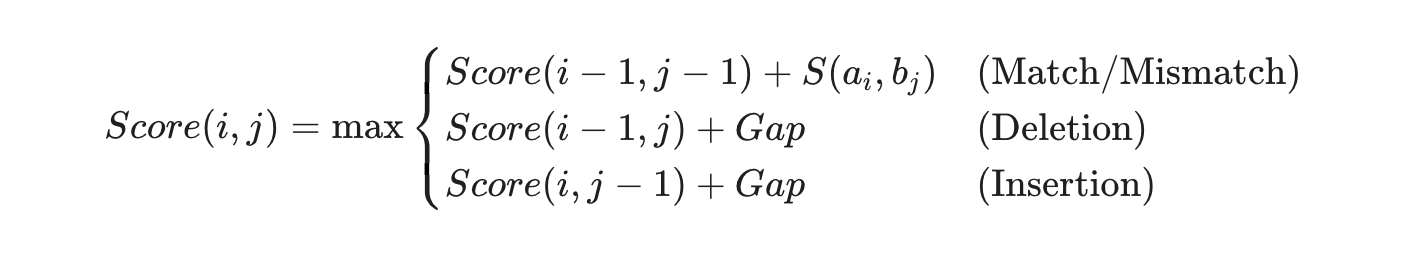

In [ ]:
# Check the internal logic of your aligner
print("Aligner Algorithm Details:")
print(aligner)

# You can also view the substitution matrix being used
print("\nSubstitution Matrix:")
print(aligner.substitution_matrix)

### 8. Visualizing the Scoring Matrix (Heatmap)

This cell extracts the matrix from the aligner and plots it. The "bright" path in the heatmap represents the optimal alignment.

### Understanding the Visualization

    The Colors: The darker colors represent lower scores (penalties), while the brighter/yellow colors represent higher scores (matches).

    The Diagonal: You will see a "trail" of higher scores moving from the top-left (0,0) to the bottom-right. This trail is exactly what the Traceback step uses to produce the text alignments you saw earlier.

    The Grid Size: You'll notice the grid is (L1​+1)×(L2​+1). The extra row and column represent the "gap" state before any characters are matched.

By combining the Dot-plot (which shows raw matches) and this Scoring Matrix (which shows the algorithm's math), you have a complete view of how DNA sequences are compared.

In [ ]:
def plot_alignment_matrix(s1, s2, aligner):
    len1, len2 = len(s1), len(s2)
    matrix = np.zeros((len1 + 1, len2 + 1))
    
    # 1. Fill the matrix manually
    for i in range(len1 + 1):
        for j in range(len2 + 1):
            # Case 1: Both are 0 (The start)
            if i == 0 and j == 0:
                matrix[i, j] = 0
            # Case 2: Sequence 1 is empty (Gap penalties for Seq 2)
            elif i == 0:
                matrix[i, j] = aligner.open_gap_score + (j - 1) * aligner.extend_gap_score
            # Case 3: Sequence 2 is empty (Gap penalties for Seq 1)
            elif j == 0:
                matrix[i, j] = aligner.open_gap_score + (i - 1) * aligner.extend_gap_score
            # Case 4: Both have characters (Ask the aligner)
            else:
                matrix[i, j] = aligner.score(s1[:i], s2[:j])

    # 2. Plotting
    plt.figure(figsize=(10, 8))
    im = plt.imshow(matrix, cmap='magma', aspect='auto')
    
    # Annotate with the scores
    for i in range(len1 + 1):
        for j in range(len2 + 1):
            plt.text(j, i, f"{matrix[i, j]:.1f}", 
                     ha="center", va="center", 
                     color="w" if matrix[i, j] < matrix.max()/2 else "black", 
                     fontsize=9)

    plt.xticks(np.arange(len2 + 1), ['-'] + list(s2))
    plt.yticks(np.arange(len1 + 1), ['-'] + list(s1))
    plt.colorbar(im, label='Cumulative Score')
    plt.title("Needleman-Wunsch Dynamic Programming Matrix")
    plt.xlabel("Sequence 2")
    plt.ylabel("Sequence 1")
    plt.show()

# Run the visualization
plot_alignment_matrix(seq1, seq2, aligner)

# <font color=red> Activity 2.2 </font>
By only running the code cells below, you will get a new heatmap. Try to reconstruct the alignment by doing the "traceback" on the matrix.

In [ ]:
# Use these settings to create a New Matrix
seq_a = "GAAATTTCG"
seq_b = "GAATTTCCG"

aligner = Align.PairwiseAligner()
aligner.match_score = 3
aligner.mismatch_score = -2
aligner.open_gap_score = -4
aligner.extend_gap_score = -3

# Students run the matrix plotting function we built earlier here
# plot_alignment_matrix(seq_a, seq_b, aligner)

In [ ]:
# Students run the matrix plotting function we built earlier here

def plot_alignment_matrix(s1, s2, aligner):
    len1, len2 = len(s1), len(s2)
    matrix = np.zeros((len1 + 1, len2 + 1))
    
    # 1. Fill the matrix manually
    for i in range(len1 + 1):
        for j in range(len2 + 1):
            # Case 1: Both are 0 (The start)
            if i == 0 and j == 0:
                matrix[i, j] = 0
            # Case 2: Sequence 1 is empty (Gap penalties for Seq 2)
            elif i == 0:
                matrix[i, j] = aligner.open_gap_score + (j - 1) * aligner.extend_gap_score
            # Case 3: Sequence 2 is empty (Gap penalties for Seq 1)
            elif j == 0:
                matrix[i, j] = aligner.open_gap_score + (i - 1) * aligner.extend_gap_score
            # Case 4: Both have characters (Ask the aligner)
            else:
                matrix[i, j] = aligner.score(s1[:i], s2[:j])

    # 2. Plotting
    plt.figure(figsize=(10, 8))
    im = plt.imshow(matrix, cmap='magma', aspect='auto')
    
    # Annotate with the scores
    for i in range(len1 + 1):
        for j in range(len2 + 1):
            plt.text(j, i, f"{matrix[i, j]:.1f}", 
                     ha="center", va="center", 
                     color="w" if matrix[i, j] < matrix.max()/2 else "black", 
                     fontsize=9)

    plt.xticks(np.arange(len2 + 1), ['-'] + list(s2))
    plt.yticks(np.arange(len1 + 1), ['-'] + list(s1))
    plt.colorbar(im, label='Cumulative Score')
    plt.title("Needleman-Wunsch Dynamic Programming Matrix")
    plt.xlabel("Sequence 2")
    plt.ylabel("Sequence 1")
    plt.show()

# Run the visualization
plot_alignment_matrix(seq1, seq2, aligner)

## Answer
Type your answer here.

### 9. Custom Substitution Matrix
You can give higher scores (lower penalties) to transitions and lower scores (higher penalties) to transversions.

In [ ]:
from Bio.Align import substitution_matrices

# Define our bases
bases = "ACGT"

# Create a manual substitution matrix (as a NumPy array)
# Rows/Cols: A, C, G, T
# We give Matches +2, Transitions -1, and Transversions -2
data = np.array([
    [ 2, -2, -1, -2], # A matches A(+2), A->C(-2), A->G(-1), A->T(-2)
    [-2,  2, -2, -1], # C
    [-1, -2,  2, -2], # G
    [-2, -1, -2,  2]  # T
])

# Create the Biopython substitution matrix object
custom_map = substitution_matrices.Array(alphabet=bases, dims=2, data=data)

# Apply to a new aligner
bio_aligner = Align.PairwiseAligner()
bio_aligner.substitution_matrix = custom_map

print("Custom Substitution Matrix applied:")
print(bio_aligner.substitution_matrix)

# <font color=red> Activity 2.2 </font>
#### "Gap Penalty" Investigation
Sometimes large insertions/deletions are common (eg. introns). Students must find the open_gap_score and extend_gap_score ratio that produces one large gap rather than many small ones.
Or gaps are rare because they cause frameshifts (eg. exons). Increase penalties until the gaps disappear, even if it results in more mismatches.

Sequence A (Reference): ACTGCTCAGAAACGTTTTGTCATGAC

Sequence B ("Mutated"): ACTGCTCAGTCATGAC

Explore the algorithm with:
-Linear gaps
-Affine gaps

Students should copy the following block into a new cell. Their goal is to modify the ??? sections to achieve two specific biological outcomes.

In [ ]:
# --- CHALLENGE SEQUENCES ---
# These are designed to 'break' under simple linear scoring.
seq_ref = "ACTGCTCAGAAACGTTTTGTCATGAC"
seq_mut = "ACTGCTCAGTCATGAC"

# --- TASK 1: THE LINEAR MODEL ---
# Goal: Treat every single dash as a separate mutation event.
# The gap opening and the gap extension MUST be mathematically identical.
aligner_linear = Align.PairwiseAligner()
aligner_linear.mode = 'global'
aligner_linear.match_score = 3
aligner_linear.mismatch_score = -3

# STUDENT TODO: Set these so that the penalty is 'Flat' or 'Linear'
aligner_linear.open_gap_score = ???
aligner_linear.extend_gap_score = ???

print("Linear Alignment Result:")
print(aligner_linear.align(seq_ref, seq_mut)[0])


In [ ]:
# --- TASK 2: THE AFFINE MODEL ---
# Goal: Model a single large 'deletion' event (common in biology).
# Hint: It should be very 'expensive' to start a gap, but 'cheap' to continue it.
aligner_affine = Align.PairwiseAligner()
aligner_affine.mode = 'global'
aligner_affine.match_score = 3
aligner_affine.mismatch_score = -3

# STUDENT TODO: Set these to favor one long gap over several small ones
aligner_affine.open_gap_score = ???
aligner_affine.extend_gap_score = ???

print("\nAffine Alignment Result:")
print(aligner_affine.align(seq_ref, seq_mut)[0])

## Answer
Type your answer here.